In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [3]:
raw_df = pd.read_csv('score.csv')
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk099' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk100' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk101' in x)]
# raw_df = raw_df[raw_df["ref"].apply(lambda x: 'spk102' in x)]

In [29]:
print('help')
for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  print("nfeat", nfeat)
  print('fpr___ tpr___ threshold')
  for i in range(len(fpr)):
    if(fpr[i] >= 0.05):
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i-1], tpr[i-1], -thresholds[i-1]))
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i], tpr[i], -thresholds[i]))
      break

help
nfeat 1
fpr___ tpr___ threshold
0.0069 0.0000 36.0744
0.0903 0.0000 64.5646
nfeat 2
fpr___ tpr___ threshold
0.0486 0.1667 96.5658
0.1181 0.1667 110.9352
nfeat 3
fpr___ tpr___ threshold
0.0417 0.1667 123.5486
0.0764 0.1667 134.3675
nfeat 4
fpr___ tpr___ threshold
0.0278 0.3333 149.9274
0.0556 0.3333 154.6393
nfeat 5
fpr___ tpr___ threshold
0.0347 0.3333 180.3050
0.0556 0.3333 183.4681
nfeat 6
fpr___ tpr___ threshold
0.0486 0.8333 206.7914
0.1042 0.8333 220.8565
nfeat 7
fpr___ tpr___ threshold
0.0486 0.8333 227.1257
0.1111 0.8333 252.1995
nfeat 8
fpr___ tpr___ threshold
0.0486 0.8333 240.2075
0.1042 0.8333 264.7231
nfeat 9
fpr___ tpr___ threshold
0.0486 0.8333 257.3538
0.0972 0.8333 272.6707
nfeat 10
fpr___ tpr___ threshold
0.0486 0.8333 269.9177
0.0694 0.8333 279.2938
nfeat 11
fpr___ tpr___ threshold
0.0069 0.6667 267.8456
0.0625 0.6667 284.3851
nfeat 12
fpr___ tpr___ threshold
0.0069 0.6667 274.7929
0.0694 0.6667 297.0362
nfeat 13
fpr___ tpr___ threshold
0.0139 0.6667 282.7595
0.0

help


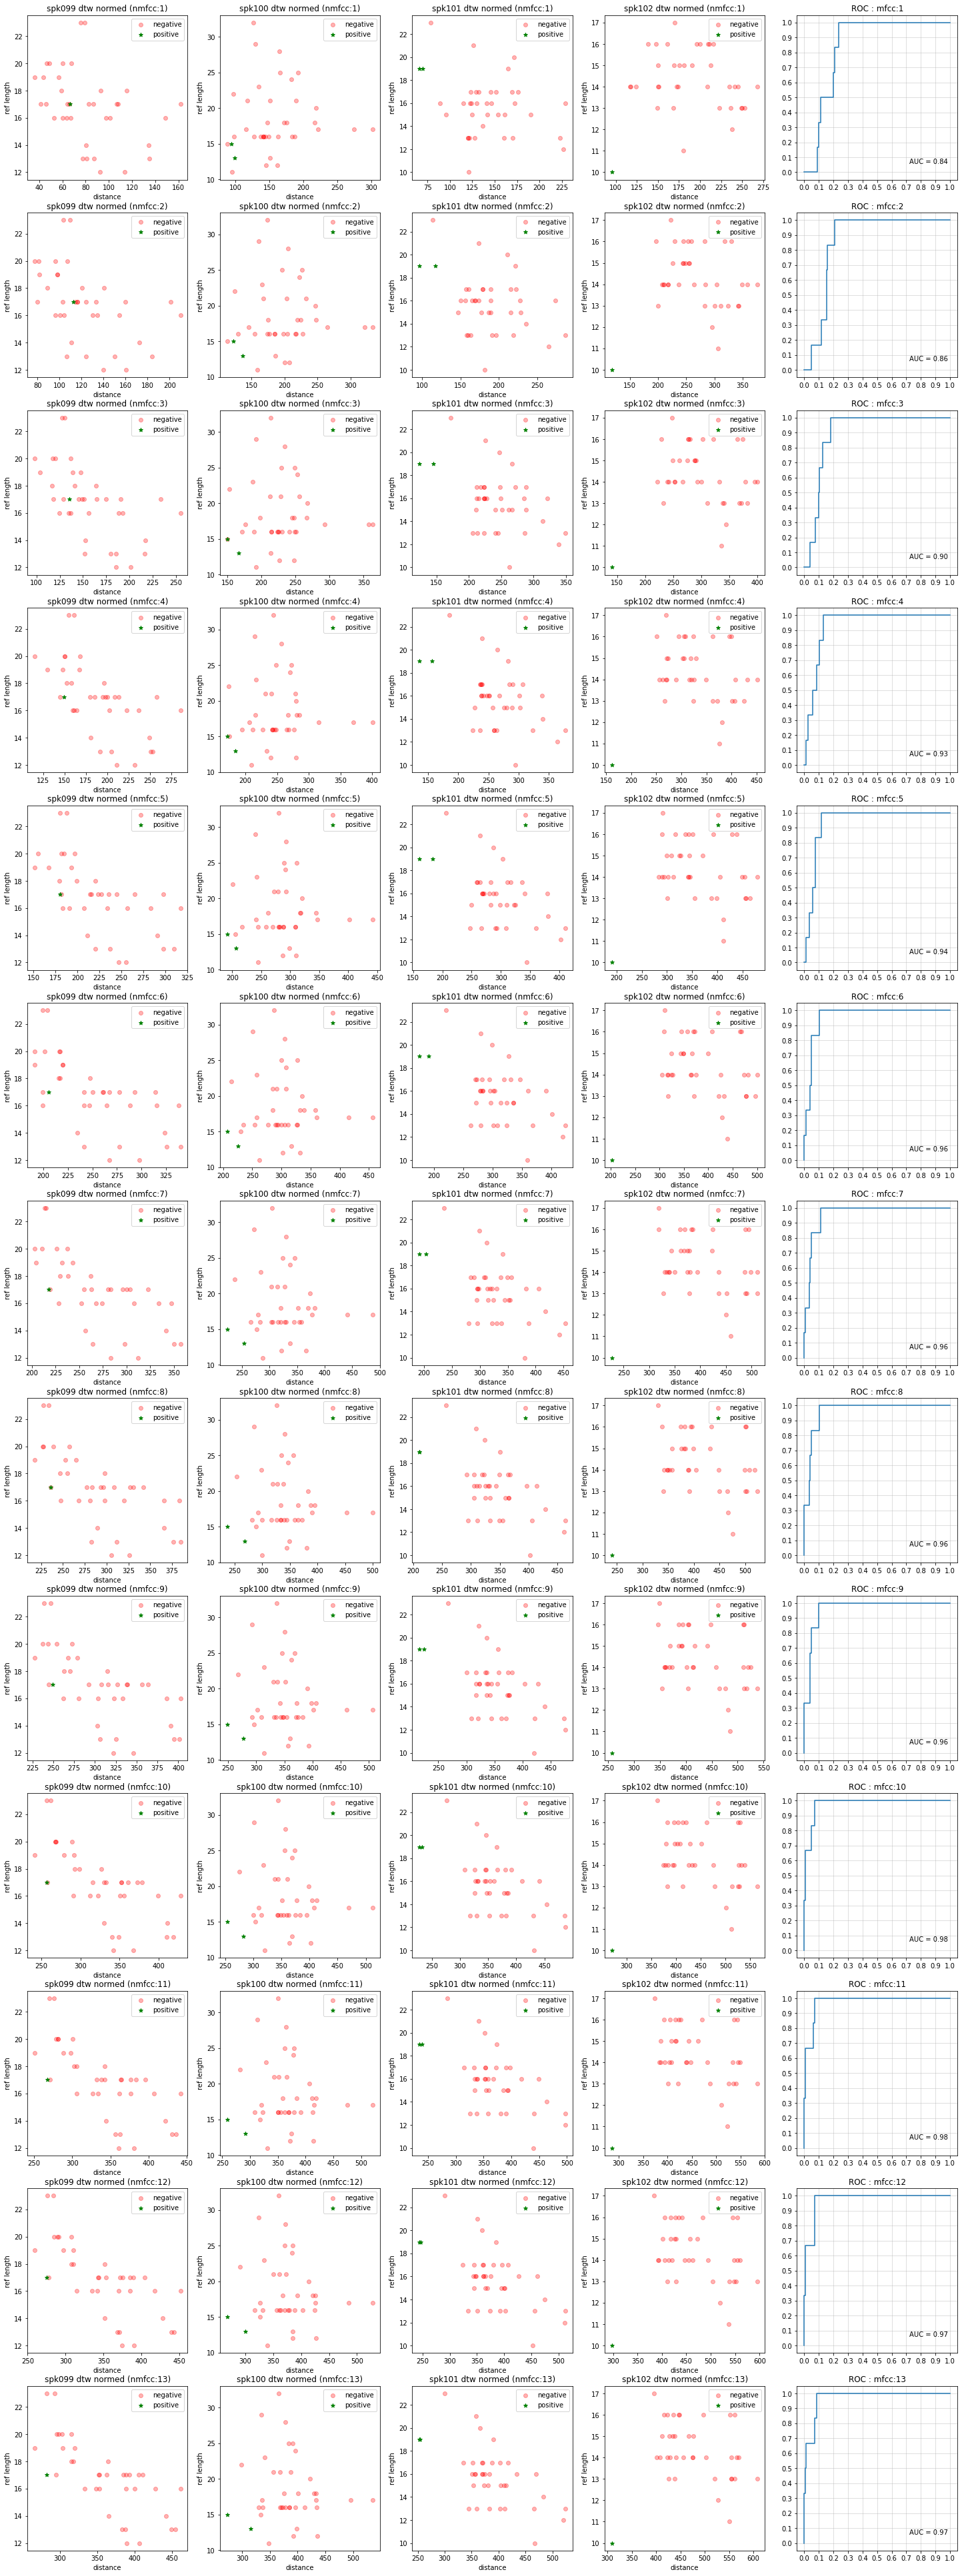

In [25]:
print('help')
plt.figure(figsize=(25, 70))

for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  

  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
    plt.subplot(13,5,((nfeat-1)*5) + i+1 )

    sel_spk = df["ref"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=1)

    plt.title(f'{spk} dtw normed (nmfcc:{nfeat})')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()

  
  plt.subplot(13,5, nfeat*5)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
#   plt.show()
plt.savefig('roc.pdf', bbox_inches='tight')